In [2]:
from torchvision import datasets

data_path = '../data/ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=False)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=False)

In [3]:
type(cifar10).__mro__

(torchvision.datasets.cifar.CIFAR10,
 torchvision.datasets.vision.VisionDataset,
 torch.utils.data.dataset.Dataset,
 object)

In [4]:
len(cifar10), len(cifar10_val)

(50000, 10000)

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'frog', 'horse', 'ship', 'trcuk']
img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x26D5ED16108>, 1, 'automobile')

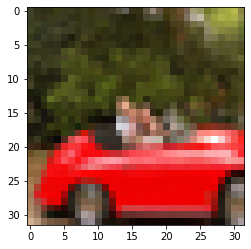

In [6]:
from matplotlib import pyplot as plt 

plt.imshow(img)
plt.show()

In [13]:
import torchvision.transforms as transforms
import torch

tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform
=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)

In [14]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [19]:
imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.4915, 0.4823, 0.4468]), tensor([0.2470, 0.2435, 0.2616]))

In [20]:
transformd_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
]))

In [21]:
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform
=transforms.ToTensor())

imgs = torch.stack([img_t for img_t, _ in tensor_cifar10_val], dim=3)

imgs.view(3, -1).mean(dim=1), imgs.view(3, -1).std(dim=1)

(tensor([0.4943, 0.4852, 0.4506]), tensor([0.2467, 0.2429, 0.2616]))

In [22]:
transformd_cifar10_val = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4943, 0.4852, 0.4506), (0.2467, 0.2429, 0.2616))
]))

In [ ]:
img_n, _ = tra

In [23]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in transformd_cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in transformd_cifar10_val if label in [0, 2]]

In [26]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=32, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=32, shuffle=False)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


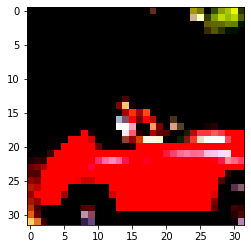

In [29]:
img_n, _ = transformd_cifar10[99]

plt.imshow(img_n.permute(1, 2, 0))
plt.show()

In [30]:
import torch.nn as nn
x = torch.tensor([[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]])
softmax = nn.Softmax(dim=1)
softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [31]:
model = nn.Sequential(
	nn.Linear(3072, 512),
	nn.Tanh(),
	nn.Linear(512, 2),
	nn.LogSoftmax(dim=1)
)

loss = nn.NLLLoss()

In [33]:
img, label = cifar2[0]
out = model(img.view(-1).unsqueeze(0))
loss(out, torch.tensor([label]))

tensor(0.8974, grad_fn=<NllLossBackward>)

In [41]:
def validation(model, val_loader):
    total = 0
    correct = 0
    
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())   
    return correct / total

def train_loop(n_epochs, model, optimizer, train_loader, val_loader, loss_fn):
    for epoch in range(n_epochs):
        for imgs, labels in train_loader:
            batch_size = imgs.shape[0]
            outputs = model(imgs.view(batch_size, -1))
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        with torch.no_grad():
            accuracy = validation(model, val_loader)
        print('Epoch: {}, Loss: {:.6f}, Accuracy: {:.4f}'.format(epoch, loss, accuracy))

In [42]:
import torch.optim as optim

model = nn.Sequential(
	nn.Linear(3072, 512),
	nn.Tanh(),
	nn.Linear(512, 2),
	nn.LogSoftmax(dim=1)
)

loss_fn = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

train_loop(
    n_epochs=100,
    model=model,
    optimizer=optimizer,
    train_loader=train_loader,
    val_loader=val_loader,
    loss_fn=loss_fn
)

Epoch: 0, Loss: 0.419110, Accuracy: 0.7995
Epoch: 1, Loss: 0.385583, Accuracy: 0.8081
Epoch: 2, Loss: 0.431234, Accuracy: 0.8135
Epoch: 3, Loss: 0.325677, Accuracy: 0.8333
Epoch: 4, Loss: 0.455713, Accuracy: 0.8404
Epoch: 5, Loss: 0.515115, Accuracy: 0.8411
Epoch: 6, Loss: 0.285058, Accuracy: 0.8542
Epoch: 7, Loss: 0.496891, Accuracy: 0.8470
Epoch: 8, Loss: 0.262507, Accuracy: 0.8636
Epoch: 9, Loss: 0.560865, Accuracy: 0.8233
Epoch: 10, Loss: 0.378894, Accuracy: 0.8808
Epoch: 11, Loss: 0.116605, Accuracy: 0.8714
Epoch: 12, Loss: 0.253598, Accuracy: 0.8886
Epoch: 13, Loss: 0.352773, Accuracy: 0.9032
Epoch: 14, Loss: 0.197127, Accuracy: 0.9126
Epoch: 15, Loss: 0.281614, Accuracy: 0.9097
Epoch: 16, Loss: 0.207479, Accuracy: 0.9387
Epoch: 17, Loss: 0.194723, Accuracy: 0.9280
Epoch: 18, Loss: 0.194474, Accuracy: 0.9308
Epoch: 19, Loss: 0.107297, Accuracy: 0.9446
Epoch: 20, Loss: 0.258231, Accuracy: 0.9372
Epoch: 21, Loss: 0.090607, Accuracy: 0.9577
Epoch: 22, Loss: 0.126061, Accuracy: 0.930

In [43]:
torch.save(model.state_dict(), 'weights/model.pt')

In [69]:
label_map = {0:0, 2:1}
class_names = ['airplane', 'bird']
origin_cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
origin_cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

Label     Predicted  
airplane  airplane   


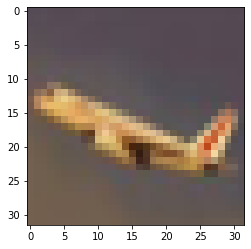

In [90]:
import random

with torch.no_grad():
    index = random.randint(0, len(cifar2))
    img, label = cifar2[index]
    origin_img, label = origin_cifar2[index]
    output = model(img.view(1, -1))
    _, predicted = torch.max(output, dim=1)

    print("{:10}{:10} ".format("Label", "Predicted"))
    print("{:10}{:10} ".format(class_names[label], class_names[predicted]))
    plt.imshow(origin_img)
    plt.show()

In [91]:
numel_list = [p.numel() for p in model.parameters() if p.requires_grad==True]

sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])